<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [13]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [14]:
from bs4 import BeautifulSoup
import requests

df = pd.read_csv ('https://raw.githubusercontent.com/KristineYW/DS-Unit-4-Sprint-1-NLP/main/module2-vector-representations/data/job_listings.csv')

descriptions = []
for i in df['description']:
    soup = BeautifulSoup(i, 'html.parser')
    descriptions.append(soup.get_text())
    
df['description'] = descriptions


In [15]:
df.head()

,Unnamed: 0,description,title
0,0,"b""Job Requirements:\nConceptual understanding ...",Data scientist
1,1,"b'Job Description\n\nAs a Data Scientist 1, yo...",Data Scientist I
2,2,b'As a Data Scientist you will be working on c...,Data Scientist - Entry Level
3,3,"b'$4,969 - $6,756 a monthContractUnder the gen...",Data Scientist
4,4,b'Location: USA \xe2\x80\x93 multiple location...,Data Scientist


## 2) Use Spacy to tokenize the listings 

In [69]:
nlp = spacy.load("en_core_web_lg")

tokens = []
for i in df['description']:
    doc = nlp(i.strip())
    doc = [token.lower_ for token in doc if (token.is_stop != True) and (token.is_punct != True)]
    tokens.append(doc)

df['tokens'] = tokens

df.head()

,Unnamed: 0,description,title,tokens
0,0,"b""Job Requirements:\nConceptual understanding ...",Data scientist,"[b""job, requirements:\nconceptual, understandi..."
1,1,"b'Job Description\n\nAs a Data Scientist 1, yo...",Data Scientist I,"[b'job, description\n\nas, data, scientist, 1,..."
2,2,b'As a Data Scientist you will be working on c...,Data Scientist - Entry Level,"[b'as, data, scientist, working, consulting, b..."
3,3,"b'$4,969 - $6,756 a monthContractUnder the gen...",Data Scientist,"[b'$4,969, $, 6,756, monthcontractunder, gener..."
4,4,b'Location: USA \xe2\x80\x93 multiple location...,Data Scientist,"[b'location, usa, \xe2\x80\x93, multiple, loca..."


In [17]:
df['tokens'][0]

['b"Job',
 'requirements:\\nconceptual',
 'understanding',
 'Machine',
 'Learning',
 'model',
 'like',
 'nai\\xc2\\xa8ve',
 'Bayes',
 'K',
 'Means',
 'SVM',
 'Apriori',
 'Linear/',
 'Logistic',
 'Regression',
 'neural',
 'Random',
 'Forests',
 'decision',
 'Trees',
 'K',
 'NN',
 'hand',
 'experience',
 '2',
 'them\\nintermediate',
 'expert',
 'level',
 'coding',
 'skill',
 'Python',
 'R.',
 'ability',
 'write',
 'function',
 'clean',
 'efficient',
 'datum',
 'manipulation',
 'mandatory',
 'role)\\nexposure',
 'package',
 'like',
 'NumPy',
 'SciPy',
 'Pandas',
 'Matplotlib',
 'etc',
 'Python',
 'GGPlot2',
 'dplyr',
 'tidyR',
 'R\\nAbility',
 'communicate',
 'Model',
 'finding',
 'Technical',
 'Non',
 'technical',
 'stake',
 'holders\\nhand',
 'experience',
 'SQL',
 'Hive',
 'similar',
 'programming',
 'language\\nmust',
 'past',
 'work',
 'GitHub',
 'Kaggle',
 'publish',
 'article\\nmaster',
 'degree',
 'Statistics',
 'Mathematics',
 'Computer',
 'Science',
 'quant',
 'specific',
 'fiel

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [60]:
def tokenize(description):
    doc = nlp(description)
    return[token.lower_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

In [61]:
vect = CountVectorizer(stop_words='english', max_features=1500, min_df=2, max_df=.98, tokenizer=tokenize)

In [62]:
vect.fit(df['description'])

/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['nt'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.98, max_features=1500, min_df=2,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function tokenize at 0x1247059d8>, vocabulary=None)

In [63]:
dtm = vect.transform(df['description'])

In [64]:
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

In [65]:
dtm.head(30)

,$,+,1,10,100,12,2,2019,3,3rd,...,written,year,years,years\xe2\x80\x99,york,you\'ll,you\xe2\x80\x99ll,you\xe2\x80\x99re,|,||
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,2,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
7,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
9,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [66]:
data[9][:50]

"b'Slack is hiring experienced data scientists to j"

In [67]:
#Three minute challenge

data = df['description']

vec = CountVectorizer(stop_words='english', max_features = 1500, min_df=2, max_df=.98, ngram_range=(1,2), tokenizer=tokenize)

vec.fit(data)

dtm2 = vec.transform(data)

dtm2 = pd.DataFrame(dtm2.todense(), columns=vect.get_feature_names())

/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['nt'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [38]:
dtm2.head(30)

,000,10,100,12,20,2019,3rd,40,500,600,...,xae,xb7,xbb,xc2,xe2,xef,year,years,york,zf
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,8,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,3,0,0,1,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,2,1,...,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,...,1,0,0,1,1,0,0,0,0,0
9,0,0,1,0,0,0,0,1,1,0,...,4,0,0,0,1,0,1,0,0,0


## 4) Visualize the most common word counts

In [68]:
from collections import Counter

def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

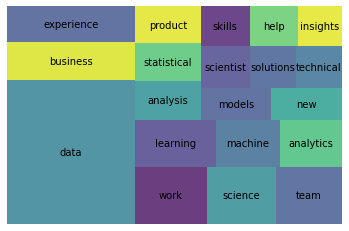

In [70]:
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

wc = count(df['tokens'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [71]:
data = df['description']

tfidf = TfidfVectorizer(stop_words='english', max_features=2000)

dtm3 = tfidf.fit_transform(data)

dtm3 = pd.DataFrame(dtm3.todense(), columns=tfidf.get_feature_names())

dtm3.head()

,000,10,100,12,15,20,2019,25,3rd,40,...,xae,xb7,xbb,xc2,xe2,xef,year,years,york,zf
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.171281,0.000000,0.0,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.167054,0.0,0.048655,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.066180,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.086129,0.0,0.000000,0.093431,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [76]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')

knn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [77]:
knn.kneighbors([dtm.iloc[2].values])

(array([[0.        , 8.54400375, 8.60232527, 8.88819442, 9.05538514]]),
 array([[  2,   4, 105, 159,  19]]))

In [78]:
knn.kneighbors([dtm.iloc[100].values])

(array([[ 0.        ,  0.        , 12.36931688, 12.36931688, 12.4498996 ]]),
 array([[100,  47, 105, 203,  19]]))

In [80]:
job = [''' Works in a team to perform data exploration and visualization, modeling, and application development. 
       Great opportunities for leadership and managerial positions. Must be able to understand the needs of the 
       client and project''']

In [81]:
knn_nn = tfidf.transform(job)

knn_nn

<1x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 18 stored elements in Compressed Sparse Row format>

In [83]:
knn.kneighbors(knn_nn.todense())

ValueError: query data dimension must match training data dimension

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 